# Titanic - Improving the model

## Importing data and libs

In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')
datas = [train_data, test_data]

## Analyzing our data

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Sex

In [4]:
sex_map = {'male' : 0, 'female' : 1}

train_data.Sex = train_data.Sex.map(sex_map)

test_data.Sex = test_data.Sex.map(sex_map)

## Age

In [5]:
# Filling the age missing values based on Sex and Class mean
age_test = train_data.groupby(['Sex', 'Pclass'])['Age']
age_test.mean()

Sex  Pclass
0    1         41.281386
     2         30.740707
     3         26.507589
1    1         34.611765
     2         28.722973
     3         21.750000
Name: Age, dtype: float64

In [6]:
# To improve: Find a better way to automatize the process!

for ds in datas:
    ds.loc[(ds['Sex'] == 0) & (ds['Pclass'] == 1) & ds['Age'].isnull(), 'Age'] = 41.281386
    ds.loc[(ds['Sex'] == 0) & (ds['Pclass'] == 2) & ds['Age'].isnull(), 'Age'] = 30.740707
    ds.loc[(ds['Sex'] == 0) & (ds['Pclass'] == 3) & ds['Age'].isnull(), 'Age'] = 26.507589
    ds.loc[(ds['Sex'] == 1) & (ds['Pclass'] == 1) & ds['Age'].isnull(), 'Age'] = 34.611765
    ds.loc[(ds['Sex'] == 1) & (ds['Pclass'] == 2) & ds['Age'].isnull(), 'Age'] = 28.722973
    ds.loc[(ds['Sex'] == 1) & (ds['Pclass'] == 3) & ds['Age'].isnull(), 'Age'] = 21.750000
    ds['Age'] = ds['Age'].astype(int)

In [7]:
pd.qcut(train_data.Age, 8)

0      (21.0, 25.0]
1      (36.0, 45.0]
2      (25.0, 26.0]
3      (30.0, 36.0]
4      (30.0, 36.0]
           ...     
886    (26.0, 30.0]
887    (17.0, 21.0]
888    (17.0, 21.0]
889    (25.0, 26.0]
890    (30.0, 36.0]
Name: Age, Length: 891, dtype: category
Categories (8, interval[float64]): [(-0.001, 17.0] < (17.0, 21.0] < (21.0, 25.0] < (25.0, 26.0] < (26.0, 30.0] < (30.0, 36.0] < (36.0, 45.0] < (45.0, 80.0]]

In [8]:
for ds in datas:
    ds.loc[ds['Age'] <= 17, 'Age'] = 0
    ds.loc[(ds['Age'] > 17) & (ds['Age'] <= 21), 'Age'] = 1
    ds.loc[(ds['Age'] > 21) & (ds['Age'] <= 25), 'Age'] = 2
    ds.loc[(ds['Age'] > 25) & (ds['Age'] <= 26), 'Age'] = 3
    ds.loc[(ds['Age'] > 26) & (ds['Age'] <= 30), 'Age'] = 4
    ds.loc[(ds['Age'] > 30) & (ds['Age'] <= 36), 'Age'] = 5
    ds.loc[(ds['Age'] > 36) & (ds['Age'] <= 45), 'Age'] = 6
    ds.loc[ds['Age'] > 45, 'Age'] = 7

In [9]:
train_data['Age'].value_counts()

1    133
5    118
6    114
0    113
3    112
4    103
7    101
2     97
Name: Age, dtype: int64

In [10]:
test_data['Age'].value_counts()

1    67
3    63
2    56
7    52
6    50
4    50
0    41
5    39
Name: Age, dtype: int64

## Embarked

In [11]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,6,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,7,0,0,113572,80.0,B28,NaN


In [12]:
embarked_treatment = train_data.groupby('Embarked')
embarked_treatment.Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [13]:
train_data.fillna({'Embarked' : 'S'}, inplace = True)

embarked_map = {'S' : 0, 'C' : 1, 'Q' : 2}

for ds in datas:
    ds.Embarked = ds.Embarked.map(embarked_map)

## Fare

In [14]:
test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",0,7,0,0,3701,NaN,NaN,0


In [15]:
test_data.fillna({'Fare' : test_data.Fare.mean()}, inplace = True)

In [16]:
pd.qcut(train_data.Fare, 5)

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [17]:
for ds in datas:
    ds['Fare'] = ds['Fare'].astype(int)
    ds.loc[ds['Fare'] <= 7.854, 'Fare'] = 0
    ds.loc[(ds['Fare'] > 7.854) & (ds['Fare'] <= 10.5), 'Fare'] = 1
    ds.loc[(ds['Fare'] > 10.5) & (ds['Fare'] <= 21.679), 'Fare'] = 2
    ds.loc[(ds['Fare'] > 21.679) & (ds['Fare'] <= 39.688), 'Fare'] = 3
    ds.loc[ds['Fare'] > 39.688, 'Fare'] = 4

## Titles

In [18]:
for ds in datas:
    ds['Title'] = ds.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Countess      1
Don           1
Lady          1
Sir           1
Jonkheer      1
Capt          1
Mme           1
Name: Title, dtype: int64

In [19]:
titles = {'Mr' : 1, 'Miss' : 2, 'Mrs' : 3, 'Master' : 4, 'Other' : 5}

for ds in datas:
    ds['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Lady', 'Capt', 'Jonkheer', 'Countess', 'Don', 'Sir', 'Dona'], 'Other', inplace = True)
    ds['Title'].replace('Ms', 'Miss', inplace = True)
    ds['Title'].replace('Mlle', 'Miss', inplace = True)
    ds['Title'].replace('Mme', 'Mrs', inplace = True)
    ds['Title'] = ds['Title'].map(titles)
    ds['Title'].fillna(0, inplace = True)

## Floors

In [20]:
for ds in datas:
    ds['Floor'] = ds.Cabin.str.extract('([A-Za-z]+)', expand = False)
    ds['Floor'].fillna('T', inplace = True)

In [21]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Floor
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,NaN,0,1,T
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,6,1,0,PC 17599,4,C85,1,3,C
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,0,NaN,0,2,T
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,4,C123,0,3,C
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,NaN,0,1,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,4,0,0,211536,2,NaN,0,5,T
887,888,1,1,"Graham, Miss. Margaret Edith",1,1,0,0,112053,3,B42,0,2,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,1,2,W./C. 6607,3,NaN,0,2,T
889,890,1,1,"Behr, Mr. Karl Howell",0,3,0,0,111369,3,C148,1,1,C


In [22]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
train_data['Floor'].value_counts()

T    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Floor, dtype: int64

In [24]:
test_data['Floor'].value_counts()

T    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Floor, dtype: int64

In [25]:
floors = {'ABC' : 1, 'DE' : 2, 'FG' : 3, 'T' : 4}

for ds in datas:
    ds['Floor'].replace(['A', 'B', 'C'], 'ABC', inplace = True)
    ds['Floor'].replace(['D', 'E'], 'DE', inplace = True)
    ds['Floor'].replace(['F', 'G'], 'FG', inplace = True)
    ds['Floor'] = ds['Floor'].map(floors)

## New features (Relatives and Age_Pclass)

In [26]:
for ds in datas:
    ds['Age_Pclass'] = ds['Age'] * ds['Pclass']
    ds['Relatives'] = ds['SibSp'] + ds['Parch']

## Removing remaining features

In [27]:
for ds in datas:
    ds.drop('Cabin', axis = 1, inplace = True)
    ds.drop('Name', axis = 1, inplace = True)
    ds.drop('Ticket', axis = 1, inplace = True)

## Final Analysis

In [28]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Floor,Age_Pclass,Relatives
0,1,0,3,0,2,1,0,0,0,1,4,6,1
1,2,1,1,1,6,1,0,4,1,3,1,6,1
2,3,1,3,1,3,0,0,0,0,2,4,9,0
3,4,1,1,1,5,1,0,4,0,3,1,5,1
4,5,0,3,0,5,0,0,1,0,1,4,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,4,0,0,2,0,5,4,8,0
887,888,1,1,1,1,0,0,3,0,2,1,1,0
888,889,0,3,1,1,1,2,3,0,2,4,3,3
889,890,1,1,0,3,0,0,3,1,1,1,3,0


In [29]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Floor,Age_Pclass,Relatives
0,892,3,0,5,0,0,0,2,1,4,15,0
1,893,3,1,7,1,0,0,0,3,4,21,1
2,894,2,0,7,0,0,1,2,1,4,14,0
3,895,3,0,4,0,0,1,0,1,4,12,0
4,896,3,1,2,1,1,2,0,3,4,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,3,0,0,1,0,1,4,9,0
414,1306,1,1,6,0,0,4,1,5,1,6,0
415,1307,3,0,6,0,0,0,0,1,4,18,0
416,1308,3,0,3,0,0,1,0,1,4,9,0


## Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(criterion = "gini", 
                     min_samples_leaf = 1, 
                     min_samples_split = 10,   
                     n_estimators=100, 
                     max_features='auto', 
                     oob_score=True, 
                     random_state=1, 
                     n_jobs=-1)

train_x = train_data.drop(['PassengerId', 'Survived'], axis = 1)
train_y = train_data['Survived']
test_x = test_data.drop('PassengerId', axis = 1)

model.fit(train_x, train_y)

prediction = model.predict(test_x)

model_accuracy = model.score(train_x, train_y)
print(model_accuracy)

0.8900112233445566


## Feature importance

In [31]:
parametros = pd.DataFrame({'feature':train_x.columns,'Parametros':np.round(model.feature_importances_,3)})
parametros = parametros.sort_values('Parametros',ascending=False).set_index('feature')

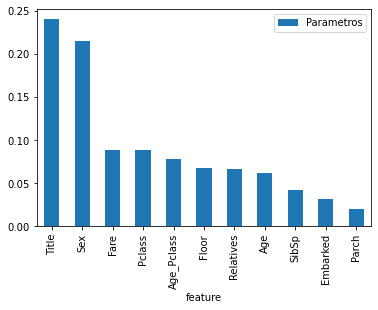

In [32]:
parametros.plot.bar()

## Submission

In [33]:
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived' : prediction})

submission.to_csv('Submission.csv', index = False)